In [5]:
import torch
import torch.nn as nn
import pandas 
import matplotlib.pyplot as plt
import random

In [6]:
#真实数据源
def generate_real():
    real_data = torch.FloatTensor([
        random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2),
        random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2), 
    ])
    return real_data


In [82]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [7]:
generate_real()

tensor([0.9719, 0.0858, 0.9713, 0.0970])

In [148]:
#构建鉴别器
class Discriminator(nn.Module):
    
    def __init__(self):
        # 初始化pytorch父类
        super().__init__()
        
        #定义神经网络
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid(),
            
        )
        #创建损失函数
        self.loss_function = nn.MSELoss()
        
        #创建优化器,使用随机梯度下降
        self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)
        
        #计时器和进程记录
        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        #计算网络的输出
        outputs = self.forward(inputs)

        #计算损失值
        loss = self.loss_function(outputs, targets)

        #每训练10次增加计数器
        self.counter += 1;
        if(self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if(self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        #归零梯度， 反向传播 ，并更新新权重
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid = True, yticks=(0, 0.25, 0.5))
        pass

pass

In [149]:
D = Discriminator()
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]),)
    D.train(generate_random(4), torch.FloatTensor([0.0]),)
    pass

counter =  10000
counter =  20000


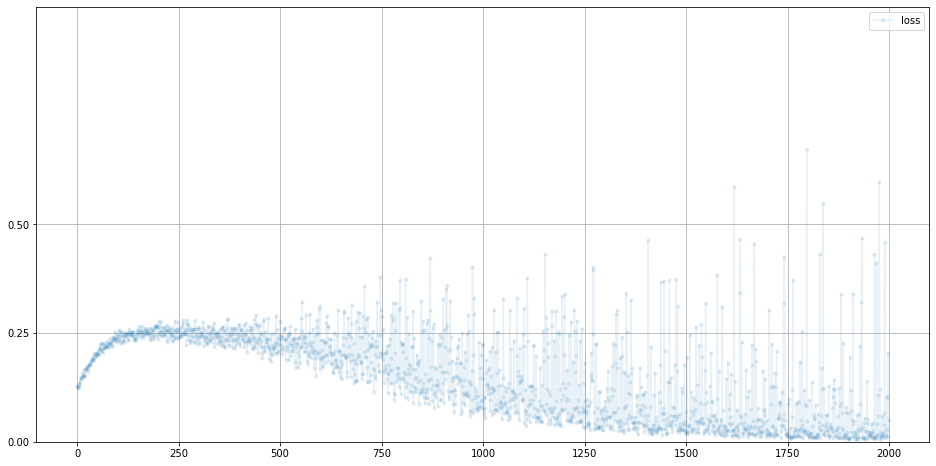

In [108]:
D.plot_progress()

In [113]:
print(D.forward(generate_real()))

tensor([0.7907], grad_fn=<SigmoidBackward0>)


In [166]:
class Generator(nn.Module):
    
    def __init__(self):
  # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):
        
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        #计算网络输出
        g_output = self.forward(inputs)
        
        #输入鉴别器
        d_output = D.forward(g_output)
        
        #计算损失函数
        loss = D.loss_function(d_output, targets)
        
            #每训练10次增加计数器
        self.counter += 1;
        if(self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        pass
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 0.25, 0.5), figsize=(16,8), alpha=0.1, marker='.', grid = True, yticks=(0, 0.25, 0.5))
        pass



In [153]:

G = Generator()

G.forward(torch.FloatTensor([0.5]))

tensor([0.3595, 0.4341, 0.4264, 0.5757], grad_fn=<SigmoidBackward0>)

In [168]:

# create Discriminator and Generator

D = Discriminator()
G = Generator()

image_list = []

# train Discriminator and Generator

for i in range(10000):
    
    # train discriminator on true
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    # add image to list every 1000
    if (i % 1000 == 0):
      image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )

    pass

counter =  10000
counter =  20000


In [167]:
#创建生成器和鉴别器

D = Discriminator()
G = Generator()

image_list = []

for i in range(10000):
    #用真实样本训练鉴别器
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    #用假样本训练鉴别器
    #使用detach（）以避免计算生成器g中的梯度
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    #用生成样本训练鉴别器
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
     # add image to list every 1000
    if (i % 1000 == 0):
        image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )
        
    pass

TypeError: train() takes 3 positional arguments but 4 were given

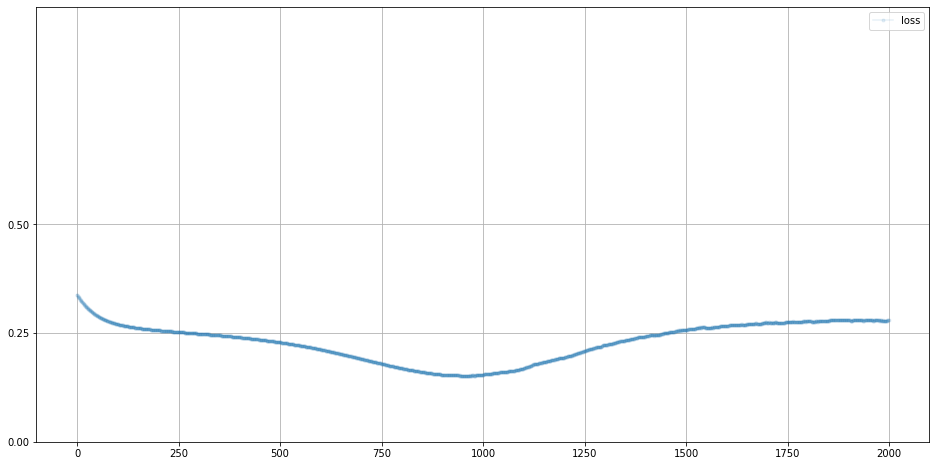

In [169]:
D.plot_progress()

ValueError: too many values to unpack (expected 2)

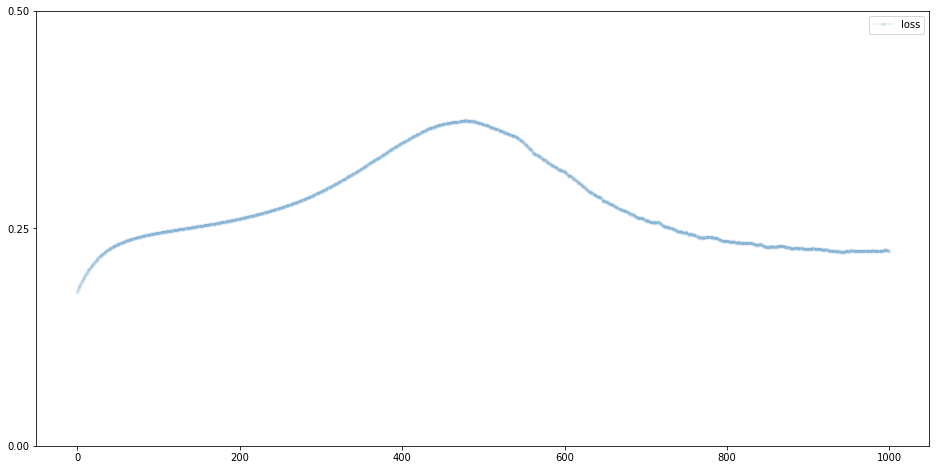

In [170]:
G.plot_progress()

In [171]:

G.forward(torch.FloatTensor([0.5]))

tensor([0.9455, 0.0408, 0.9484, 0.0388], grad_fn=<SigmoidBackward0>)